#### Implement Classification Tree on Synthetic Data

In [37]:
from DT import ClassificationTree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [38]:
X,y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3, random_state=0)
tree = ClassificationTree()
tree.fit(X, y)

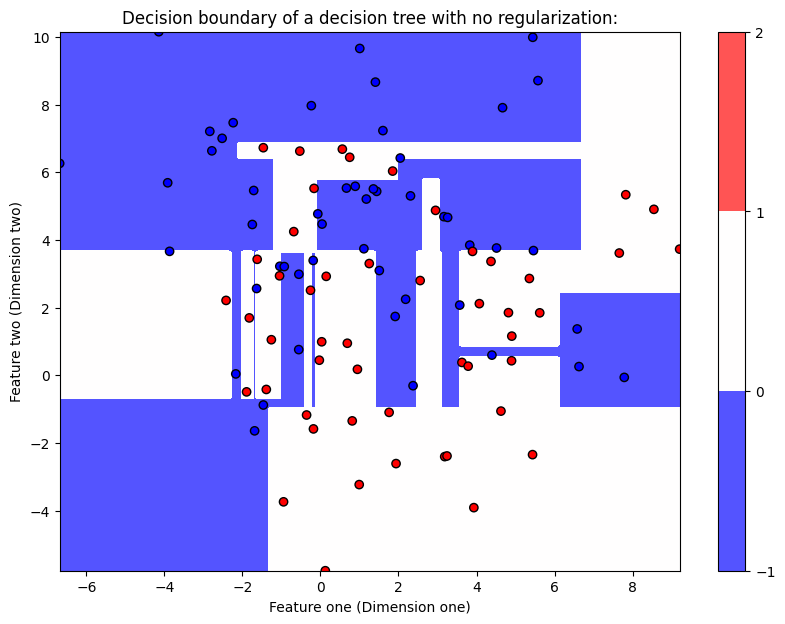

In [39]:
train_set = X.copy()
labels = y.copy()

# Calculate limits of each dimension of the training set.
X_one_min = X[:, 0].min()
X_one_max = X[:, 0].max()
X_two_min = X[:, 1].min()
X_two_max = X[:, 1].max()

# Calculate the decision boundary of the model.
X1, X2 = np.meshgrid(np.linspace(X_one_min, X_one_max, 500),
                     np.linspace(X_two_min, X_two_max, 500))
X = [[x1, x2] for x1, x2 in zip(X1.flatten(), X2.flatten())]
def y(x): return tree.predict_class(np.array(x))


Y = [y(x) for x in X]
Y = np.array(Y)
Y = Y.reshape(X1.shape)

fig = plt.gcf()
fig.set_size_inches((10, 7))

# Plot the decision boundary of the model.
num_classes = len(np.unique(labels))
cp1 = plt.contourf(X1, X2, Y, [-1, 0, 1, 2], cmap='bwr')
plt.scatter(train_set[:, 0], train_set[:, 1], c=labels,
            cmap='bwr', edgecolors='black')

plt.xlim(X_one_min, X_one_max)
plt.ylim(X_two_min, X_two_max)
plt.xlabel('Feature one (Dimension one)')
plt.ylabel('Feature two (Dimension two)')
plt.title('Decision boundary of a decision tree with no regularization:')

# Add colorbar with labeled colors
colorbar = plt.colorbar(cp1)
# colorbar.set_ticks(range(num_classes))
# colorbar.set_ticklabels(range(num_classes))

plt.show()